<a href="https://colab.research.google.com/github/Harithelamin/Computational_Intelligence/blob/main/AgeGenderDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Age & Gender Detection Project
#RNN



ACIT4620-1 22H Computational Intelligence: Theory and Applications

1. Import All library


In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, random, io,  tensorflow as tf, tensorflow as keras


In [9]:
! pip install tensorflow

In [10]:
! pip install keras

In [11]:
#!pip  install tensorflow
#!pip  install tensorflow.keras

from tensorflow import keras
from keras import layers


2. Loading datasets.AGE, GENDER AND ETHNICITY (FACE DATA) CSV


database link: https://www.kaggle.com/datasets/nipunarora8/age-gender-and-ethnicity-face-data-csv?resource=download

In [6]:
#Get Data from Google Drive
from google.colab import files
uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['age_gender.csv']))
df.head()
print(df)

ModuleNotFoundError: No module named 'google.colab'

In [2]:
#Get Data from local drive
import pandas as pd
from pathlib import Path
data = Path("C:/users/harit/Documents/age_gender.csv")
df = pd.read_csv(data.resolve(), sep=',')
df.head(3)


,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...


In [18]:
df.nunique()

age            104
ethnicity        5
gender           2
img_name     23479
pixels       23315
dtype: int64

In [3]:
#df.nunique()
#df.shape
df.nunique()


age            104
ethnicity        5
gender           2
img_name     23479
pixels       23315
dtype: int64

In [4]:
df.head(10)

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,20161220144911423.jpg.chip.jpg,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,20161220144914327.jpg.chip.jpg,202 205 209 210 209 209 210 211 212 214 218 21...
5,1,2,0,20161220144957407.jpg.chip.jpg,195 198 200 200 198 198 199 199 198 197 197 19...
6,1,2,0,20161220145040127.jpg.chip.jpg,208 216 217 219 222 223 222 221 220 220 221 22...
7,1,2,0,20170109191125532.jpg.chip.jpg,99 142 169 177 179 181 183 186 187 186 191 190...
8,1,2,0,20161219222749039.jpg.chip.jpg,127 127 133 140 143 148 152 157 160 165 172 17...
9,1,2,0,20170109191209991.jpg.chip.jpg,199 211 211 214 216 216 219 221 222 224 219 21...


In [5]:
df.info

<bound method DataFrame.info of        age  ethnicity  gender                        img_name  \
0        1          2       0  20161219203650636.jpg.chip.jpg   
1        1          2       0  20161219222752047.jpg.chip.jpg   
2        1          2       0  20161219222832191.jpg.chip.jpg   
3        1          2       0  20161220144911423.jpg.chip.jpg   
4        1          2       0  20161220144914327.jpg.chip.jpg   
...    ...        ...     ...                             ...   
23700   99          0       1  20170120221920654.jpg.chip.jpg   
23701   99          1       1  20170120134639935.jpg.chip.jpg   
23702   99          2       1  20170110182418864.jpg.chip.jpg   
23703   99          2       1  20170117195405372.jpg.chip.jpg   
23704   99          0       1  20170110182052119.jpg.chip.jpg   

                                                  pixels  
0      129 128 128 126 127 130 133 135 139 142 145 14...  
1      164 74 111 168 169 171 175 182 184 188 193 199...  
2      67 

In [6]:
df.describe()

,age,ethnicity,gender
count,23705.000000,23705.000000,23705.000000
mean,33.300907,1.269226,0.477283
std,19.885708,1.345638,0.499494
min,1.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000
50%,29.000000,1.000000,0.000000
75%,45.000000,2.000000,1.000000
max,116.000000,4.000000,1.000000


In [7]:
#Columns Headers
df.columns

Index(['age', 'ethnicity', 'gender', 'img_name', 'pixels'], dtype='object')

# Add RNN layers

In [13]:
model = keras.Sequential()
# Add an Embedding layer expecting input vocab of size 1000, and
# output embedding dimension of size 64.
model.add(layers.Embedding(input_dim=1000, output_dim=64))

# Add a LSTM layer with 128 internal units.
model.add(layers.LSTM(128))

# Add a Dense layer with 10 units.
model.add(layers.Dense(10))



In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 64)          64000     
                                                                 
 lstm_1 (LSTM)               (None, 128)               98816     
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 164,106
Trainable params: 164,106
Non-trainable params: 0
_________________________________________________________________


In [23]:
#Add train model
from sklearn.model_selection import train_test_split
Col = ['gender','age']

y=df[Col]
X=df.drop(Col,axis=1)

X= pd.Series(X['pixels'])


X = X.apply(lambda x: x.split(' '))
X = X.apply(lambda x: np.array(list(map(lambda z: int(z), x))))
X = np.array(X)
X = np.stack(np.array(X), axis=0)
X = np.reshape(X, (-1, 48, 48))

X.shape

(23705, 48, 48)

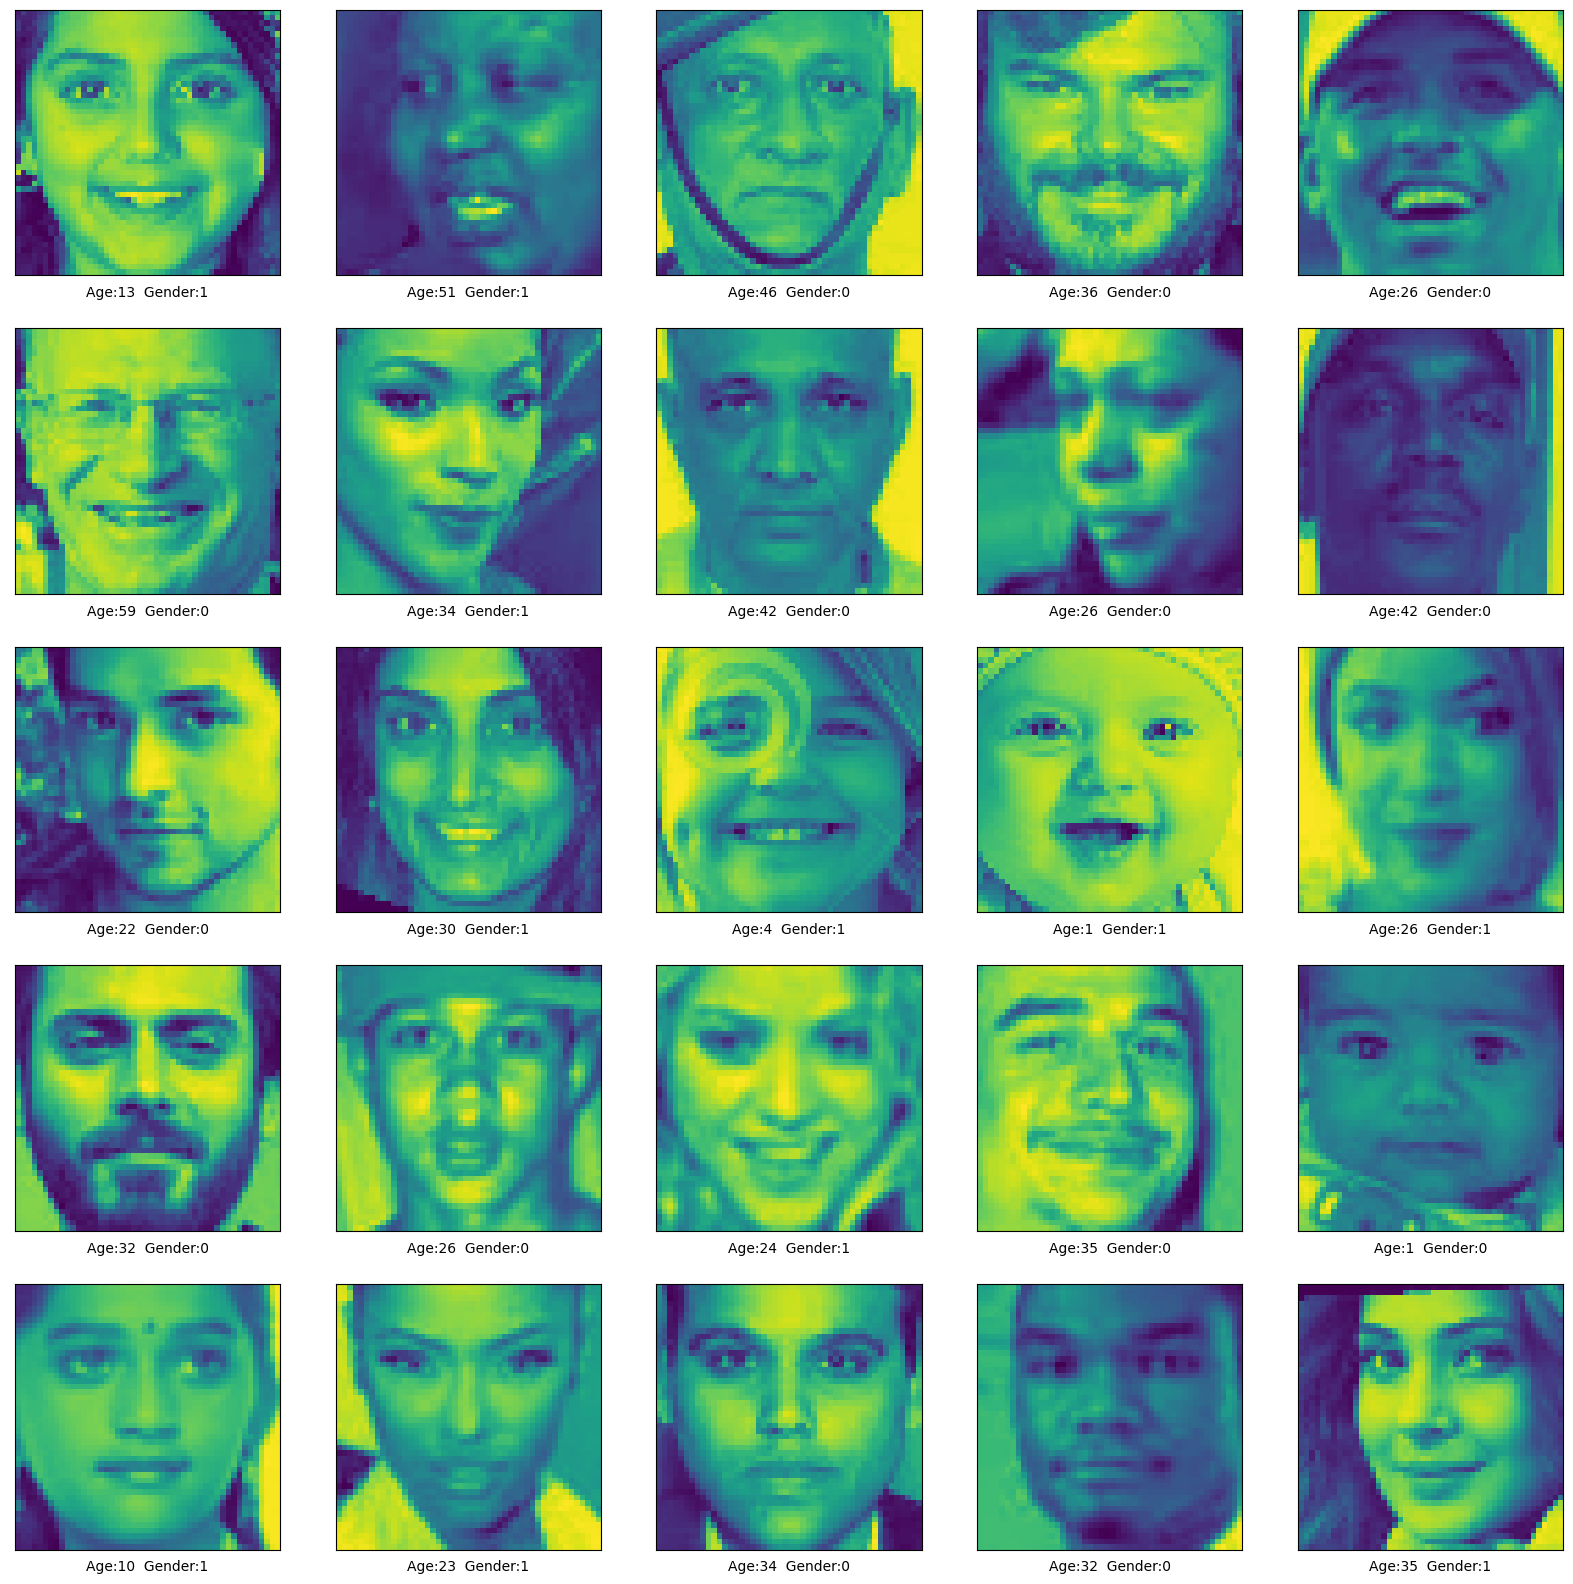

In [24]:
#Plot data
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))

for i,a in zip(np.random.randint(0, 23705, 25),range(1,26)):
    plt.subplot(5,5,a)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X[i])
    plt.xlabel(
        "Age:"+str(y['age'].iloc[i])+       
        "  Gender:"+ str(y['gender'].iloc[i])
    )
plt.show()

In [25]:
y_age=np.array(y['age'])
y_gender=np.array(y['gender'])

In [27]:
#Split Gender X, and Y train, and test 
X_gender_train, X_gender_test, y_gender_train, y_gender_test = train_test_split(X, y_gender, train_size=0.9)
    

#Add train model

In [28]:
##Split Age X, and Y train, and test 
X_age_train, X_age_test, y_age_train, y_age_test = train_test_split(X, y_age, train_size=0.9)

#using Optimizer
#https://faroit.com/keras-docs/0.2.0/optimizers/

#Build Model

In [29]:
#Building Model using Adam Opptimizer

#Set Input Shape H, and L
Nomb_pix=2304
H=48
L=48

def RMSprop():
    return keras.optimizers.RMSprop(learning_rate = 0.001, rho = 0.9)


import tensorflow as tf
def build_model_with_Aadm_optimizer(num_classes, activation='softmax', loss='sparse_categorical_crossentropy'):
    
    inputs = tf.keras.Input(shape=(H, L, 1))
    x = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)(inputs)
    x = tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu')(x)
    x = tf.keras.layers.MaxPooling2D()(x)
    x = tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu')(x)
    x = tf.keras.layers.MaxPooling2D()(x)
    x = tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu')(x)
    x = tf.keras.layers.MaxPooling2D()(x)
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(128, activation='relu')(x)
    outputs = tf.keras.layers.Dense(num_classes, activation=activation)(x)
    
    model = tf.keras.Model(inputs=inputs, outputs=outputs)

    #Adam Optimizer
    optimizer = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
    #model.compile(loss='categorical_crossentropy', metrics=['accuracy'] ,optimizer=optimizer)

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
    #model.compile(loss = 'mean_squared_error',     optimizer = 'sgd', metrics = [metrics.categorical_accuracy])

    #model.compile(loss = 'categorical_crossentropy', optimizer = RMSprop(), metrics = ['accuracy'])
    return model

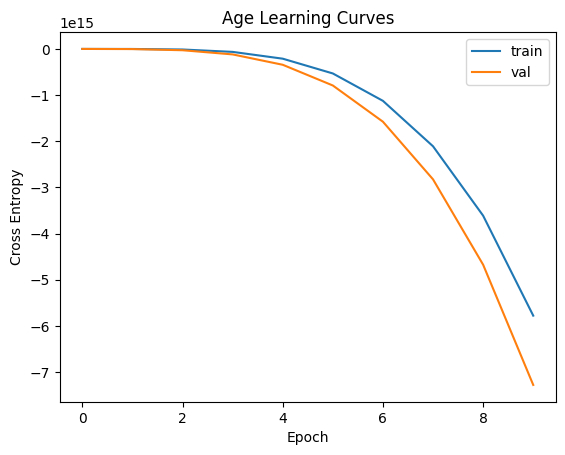

In [30]:
#Age model History
age_model = build_model_with_Aadm_optimizer(1, activation='sigmoid', loss='binary_crossentropy')

age_history= age_model.fit(
    X_age_train,
    y_age_train,
    validation_split=0.2,
    batch_size=64,
    epochs=10,
    callbacks=[tf.keras.callbacks.ReduceLROnPlateau()],
    verbose=0
)

#Age Learning carve
plt.title('Age Learning Curves')
plt.xlabel('Epoch')
plt.ylabel('Cross Entropy')
plt.plot(age_history.history['loss'], label='train')
plt.plot(age_history.history['val_loss'], label='val')
plt.legend()
plt.show()


#Model Evaluate
#age_history.evaluate(X_age_test,y_age_test)

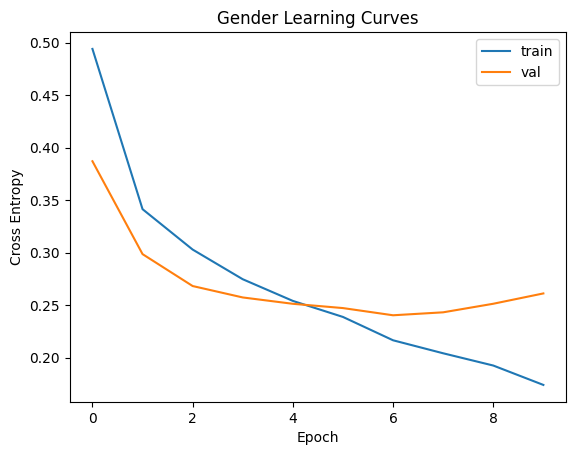

In [31]:
#Gender model History
gender_model = build_model_with_Aadm_optimizer(1, activation='sigmoid', loss='binary_crossentropy')

gender_history= gender_model.fit(
    X_gender_train,
    y_gender_train,
    validation_split=0.2,
    batch_size=64,
    epochs=10,
    callbacks=[tf.keras.callbacks.ReduceLROnPlateau()],
    verbose=0
)

#Gender Learning carve
plt.title('Gender Learning Curves')
plt.xlabel('Epoch')
plt.ylabel('Cross Entropy')
plt.plot(age_history.history['loss'], label='train')
plt.plot(age_history.history['val_loss'], label='val')
plt.legend()
plt.show()


#Model Evaluate
#Gender_history.evaluate(X_gender_test,y_gender_test)

#Evaluate Age Model

In [34]:
print("Evaluate Age Model....")
age_model.evaluate(X_age_test, y_age_test)

Evaluate Age Model....
75/75 [==============================] - 2s 27ms/step - loss: -7132925455761408.0000 - accuracy: 0.0456


[-7132925455761408.0, 0.045550402253866196]

#Evaluate Gender Model

In [35]:
print("Evaluate gender Model....")
gender_model.evaluate(X_gender_test, y_gender_test)

Evaluate gender Model....
75/75 [==============================] - 1s 14ms/step - loss: 0.2701 - accuracy: 0.9005


[0.27006590366363525, 0.9004639387130737]